In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import linear_reset
import wooldridge as wdg

In [47]:
df = wdg.data('rental')

In [48]:
df

,city,year,pop,enroll,rent,rnthsg,tothsg,avginc,lenroll,lpop,...,lavginc,clenroll,clpop,clrent,cltothsg,clrnthsg,clavginc,pctstu,cpctstu,y90
0,1,80,75211.0,15303.0,197,13475.0,26167.0,11537.0,9.635804,11.228053,...,9.353314,NaN,NaN,NaN,NaN,NaN,NaN,20.346758,NaN,0
1,1,90,77759.0,18017.0,342,15660.0,29467.0,19568.0,9.799071,11.261370,...,9.881651,-15293.201172,0.033317,0.551607,0.118772,0.150273,0.528337,23.170309,2.823551,1
2,2,80,106743.0,22462.0,323,14580.0,37277.0,19841.0,10.019580,11.578179,...,9.895506,NaN,NaN,NaN,NaN,NaN,NaN,21.043066,NaN,0
3,2,90,141865.0,29769.0,496,26895.0,55540.0,31885.0,10.301223,11.862631,...,10.369891,-22451.699219,0.284451,0.428924,0.398727,0.612289,0.474385,20.984034,-0.059032,1
4,3,80,36608.0,11847.0,216,7026.0,13482.0,11455.0,9.379830,10.508022,...,9.346182,NaN,NaN,NaN,NaN,NaN,NaN,32.361778,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,62,90,56856.0,10640.0,352,8980.0,21118.0,24735.0,9.272376,10.948277,...,10.115974,-9600.727539,0.098765,0.447531,0.140006,0.225234,0.537041,18.713943,0.057011,1
124,63,80,48347.0,9051.0,220,8224.0,18085.0,13458.0,9.110631,10.786160,...,9.507329,NaN,NaN,NaN,NaN,NaN,NaN,18.720913,NaN,0
125,63,90,51003.0,9961.0,344,10073.0,19970.0,21947.0,9.206432,10.839640,...,9.996386,-9041.793945,0.053480,0.447014,0.099148,0.202803,0.489057,19.530224,0.809311,1
126,64,80,170616.0,37475.0,243,34108.0,66451.0,16510.0,10.531429,12.047171,...,9.711721,NaN,NaN,NaN,NaN,NaN,NaN,21.964529,NaN,0


In [49]:
df.shape

(128, 23)

In [50]:
df.corr().round(4)

,city,year,pop,enroll,rent,rnthsg,tothsg,avginc,lenroll,lpop,...,lavginc,clenroll,clpop,clrent,cltothsg,clrnthsg,clavginc,pctstu,cpctstu,y90
city,1.0000,0.0000,0.0427,-0.0579,-0.2139,0.0357,0.0377,-0.2027,-0.1736,-0.0957,...,-0.1797,0.0418,-0.2088,-0.2469,-0.0610,-0.1508,-0.1733,-0.0113,0.0086,-0.0000
year,0.0000,1.0000,0.0565,0.1479,0.7702,0.0971,0.1151,0.6892,0.1659,0.0878,...,0.7455,NaN,NaN,NaN,NaN,NaN,NaN,0.0316,NaN,1.0000
pop,0.0427,0.0565,1.0000,0.7639,0.0887,0.9826,0.6106,0.1876,0.6024,0.8620,...,0.1952,-0.7168,0.0492,0.1421,0.0775,0.0010,0.1278,-0.4330,0.0660,0.0565
enroll,-0.0579,0.1479,0.7639,1.0000,0.2036,0.7698,0.4256,0.1988,0.9334,0.6819,...,0.1992,-0.9608,0.1083,0.1652,0.0256,0.0058,0.1035,0.1152,0.0000,0.1479
rent,-0.2139,0.7702,0.0887,0.2036,1.0000,0.1188,0.1229,0.8810,0.2466,0.1645,...,0.8421,-0.0860,0.3679,0.6038,0.1338,0.2405,0.2412,0.0348,0.1712,0.7702
rnthsg,0.0357,0.0971,0.9826,0.7698,0.1188,1.0000,0.6211,0.1818,0.6078,0.8365,...,0.1919,-0.7220,0.0284,0.2084,0.0843,-0.0407,0.1530,-0.3987,0.0568,0.0971
tothsg,0.0377,0.1151,0.6106,0.4256,0.1229,0.6211,1.0000,0.1695,0.3484,0.5653,...,0.1843,-0.2997,0.1827,0.1773,0.8167,0.0823,0.1446,-0.3255,-0.0508,0.1151
avginc,-0.2027,0.6892,0.1876,0.1988,0.8810,0.1818,0.1695,1.0000,0.2058,0.2792,...,0.9705,-0.1012,0.4120,0.3420,0.1582,0.3600,0.5324,-0.1760,0.0391,0.6892
lenroll,-0.1736,0.1659,0.6024,0.9334,0.2466,0.6078,0.3484,0.2058,1.0000,0.6498,...,0.2014,-0.9090,0.1222,0.1984,0.0528,-0.0038,0.1066,0.2123,0.0046,0.1659
lpop,-0.0957,0.0878,0.8620,0.6819,0.1645,0.8365,0.5653,0.2792,0.6498,1.0000,...,0.2857,-0.6333,0.0958,0.1816,0.1479,0.0231,0.1395,-0.5806,0.0602,0.0878


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      128 non-null    int64  
 1   year      128 non-null    int64  
 2   pop       128 non-null    float64
 3   enroll    128 non-null    float64
 4   rent      128 non-null    int64  
 5   rnthsg    128 non-null    float64
 6   tothsg    128 non-null    float64
 7   avginc    128 non-null    float64
 8   lenroll   128 non-null    float64
 9   lpop      128 non-null    float64
 10  lrent     128 non-null    float64
 11  ltothsg   128 non-null    float64
 12  lrnthsg   128 non-null    float64
 13  lavginc   128 non-null    float64
 14  clenroll  64 non-null     float64
 15  clpop     64 non-null     float64
 16  clrent    64 non-null     float64
 17  cltothsg  64 non-null     float64
 18  clrnthsg  64 non-null     float64
 19  clavginc  64 non-null     float64
 20  pctstu    128 non-null    float6

In [52]:
df.isnull().sum()

city         0
year         0
pop          0
enroll       0
rent         0
rnthsg       0
tothsg       0
avginc       0
lenroll      0
lpop         0
lrent        0
ltothsg      0
lrnthsg      0
lavginc      0
clenroll    64
clpop       64
clrent      64
cltothsg    64
clrnthsg    64
clavginc    64
pctstu       0
cpctstu     64
y90          0
dtype: int64

In [53]:
df.nunique().sort_values()

y90           2
year          2
clrent       63
clavginc     64
clrnthsg     64
cltothsg     64
clpop        64
clenroll     64
cpctstu      64
city         64
lrent       103
rent        103
lenroll     126
enroll      126
lrnthsg     127
tothsg      127
rnthsg      127
ltothsg     127
lavginc     128
avginc      128
pop         128
pctstu      128
lpop        128
dtype: int64

# Problema:

O arquivo rental (disponível na biblioteca "wooldridge" do R) contém 128 observações de dados municipais. As variáveis de interesse na análise são:

rent: valor médio do aluguel mensal no município (dólares)

avginc: renda per capita do município (dólares anuais)

enroll: número de alunos de graduação residentes no município

Sejam os modelos: 

Modelo 1: rent = a + b1 avginc + b2 enroll + erro
Modelo 2: ln(rent) = a + b1 ln(avginc) + b2 enroll + erro


1) Estime os modelo por MQO e analise as estimativas e testes estatísticos para os coeficientes;

2) Compare a qualidade do ajuste dos modelos 1 e 2;

3) Analise o resultado do teste de especificação (RESET) para o modelo 2;

4) Adicione o termo quadrático para variável enroll no modelo 2 e interprete o resultado (o que significa a relação quadrática?);

In [54]:
rg1 = smf.ols('rent ~ avginc + enroll', data = df)
rg1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           1.82e-41
Time:                        23:28:53   Log-Likelihood:                -697.42
No. Observations:                 128   AIC:                             1401.
Df Residuals:                     125   BIC:                             1409.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.6666     16.116      2.523      0.013       8.772      72.562
avginc         0.0150      0.001     20.310      0.000       0.014       0.016
enroll         0.0004      0.001      0.688      0.493      -0.001       0.001
==============================================================================
Omnibus:                       66.031   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.585
Skew:                           1.961   Prob(JB):                     4.64e-49
Kurtosis:                       8.133   Cond. No.                     8.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
rg = smf.ols('rent ~ avginc', data = df)
rg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     437.1
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           8.75e-43
Time:                        23:28:53   Log-Likelihood:                -697.66
No. Observations:                 128   AIC:                             1399.
Df Residuals:                     126   BIC:                             1405.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.3564     14.574      3.112      0.002      16.515      74.198
avginc         0.0151      0.001     20.907      0.000       0.014       0.017
==============================================================================
Omnibus:                       66.814   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.446
Skew:                           1.979   Prob(JB):                     1.50e-50
Kurtosis:                       8.231   Cond. No.                     5.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

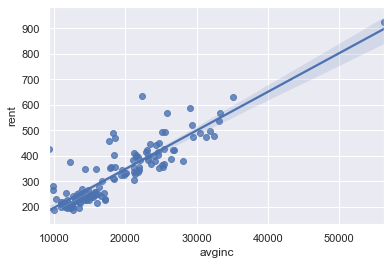

In [56]:
sns.regplot(x = 'avginc', y = 'rent', data = df);

In [57]:
rg2 = smf.ols('np.log(rent) ~ np.log(avginc) + enroll', data = df)
rg2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(rent)   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     180.0
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           1.59e-37
Time:                        23:28:53   Log-Likelihood:                 46.505
No. Observations:                 128   AIC:                            -87.01
Df Residuals:                     125   BIC:                            -78.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.4195      0.439     -5.509      0.000      -3.289      -1.550
np.log(avginc)     0.8309      0.045     18.328      0.000       0.741       0.921
enroll          1.791e-06   1.56e-06      1.152      0.252   -1.29e-06    4.87e-06
==============================================================================
Omnibus:                       57.992   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.953
Skew:                           1.710   Prob(JB):                     1.87e-40
Kurtosis:                       7.755   Cond. No.                     6.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
result = rg2.fit()

In [62]:
lr = linear_reset(result, power = 2, test_type = "fitted")
lr.summary()

C:\Users\andre\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


'<Wald test (chi2): statistic=[[5.73177731]], p-value=0.016660612620022573, df_denom=1>'

In [60]:
df['enroll2'] = df['enroll']**2

In [61]:
rg3 = smf.ols('np.log(rent) ~ np.log(avginc) + enroll + enroll2', data = df)
rg3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(rent)   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     125.7
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           1.91e-37
Time:                        23:28:53   Log-Likelihood:                 49.133
No. Observations:                 128   AIC:                            -90.27
Df Residuals:                     124   BIC:                            -78.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.4734      0.433     -5.717      0.000      -3.330      -1.617
np.log(avginc)     0.8269      0.045     18.529      0.000       0.739       0.915
enroll          1.032e-05   4.04e-06      2.553      0.012    2.32e-06    1.83e-05
enroll2        -1.467e-10   6.43e-11     -2.280      0.024   -2.74e-10   -1.93e-11
==============================================================================
Omnibus:                       55.881   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.921
Skew:                           1.660   Prob(JB):                     2.09e-37
Kurtosis:                       7.544   Cond. No.                     2.22e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""